In [45]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

import unicodedata
def normalize_characters(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

In [19]:
df = pd.read_csv('2022-23 season training data.csv')
df = df.drop(df.columns[0], axis=1)

In [20]:
correlation_matrix1 = df.corr()
x_labels=correlation_matrix1.columns[1::2]
y_labels=correlation_matrix1.columns[::2]

C:\Users\andre\AppData\Local\Temp\ipykernel_6256\2570149975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix1 = df.corr()


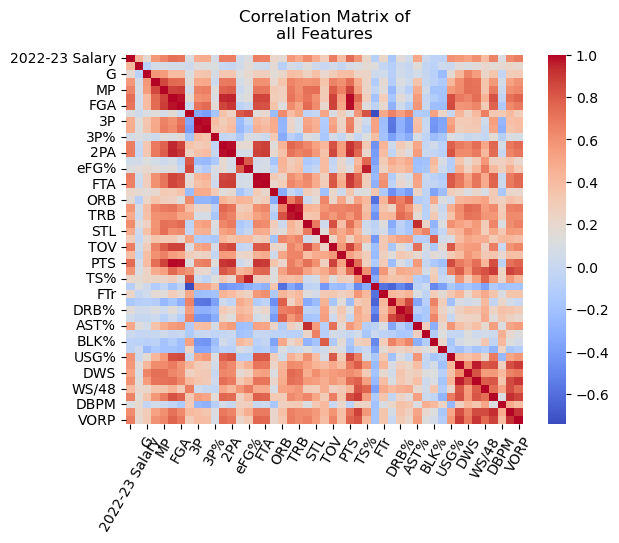

In [21]:
cmap = {'2D68C4': (45, 104, 196), '#F2A900': (242, 169, 0), '#C9082A': (201, 8, 42)}

sns.heatmap(correlation_matrix1, annot=False, cmap='coolwarm', fmt='', annot_kws={"size": 5})
plt.xticks(rotation=60)
plt.title('Correlation Matrix of\nall Features', y =1.02)
plt.savefig('figures/Correlation Matrix 2.png', bbox_inches='tight')

plt.show()

In [23]:
correlations_with_salary = correlation_matrix1['2022-23 Salary']

# Sort the correlations in descending order to find the strongest ones
sorted_correlations = correlations_with_salary.abs().sort_values(ascending=False)

In [31]:
sorted_correlations =sorted_correlations[1:17].index.tolist()

In [32]:
sorted_stats = df[sorted_correlations]

In [33]:
correlation_matrix2 = sorted_stats.corr()

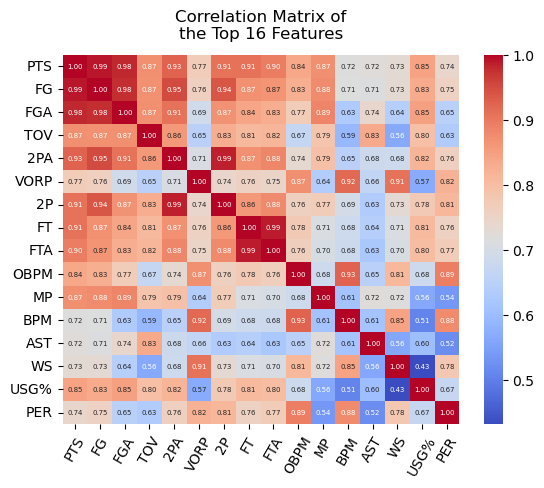

In [34]:
cmap = {'2D68C4': (45, 104, 196), '#F2A900': (242, 169, 0), '#C9082A': (201, 8, 42)}

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 5})
plt.xticks(rotation=60)
plt.title('Correlation Matrix of\nthe Top 16 Features', y =1.02)
plt.savefig('figures/Correlation Matrix 2.png', bbox_inches='tight')

plt.show()

In [36]:
final_features = ['PTS', 'TOV', 'AST', 'VORP', 'PER']
final_stats = df[final_features]
final_stats = final_stats.rename(columns={'PTS' : 'PPG'})

In [39]:
final_correlation_matrix = final_stats.corr()

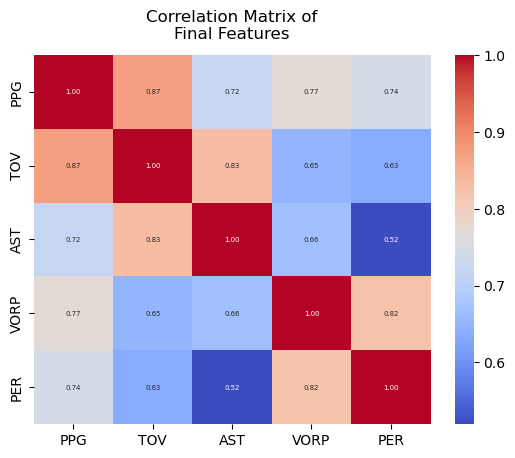

In [40]:
sns.heatmap(final_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 5})
plt.title('Correlation Matrix of\nFinal Features', y= 1.02)
plt.savefig('figures/Correlation Matrix Final.png', bbox_inches='tight')

plt.show()

In [42]:
X = df[final_features]
y = df['2022-23 Salary']/1000000

In [43]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 4.881588488866972


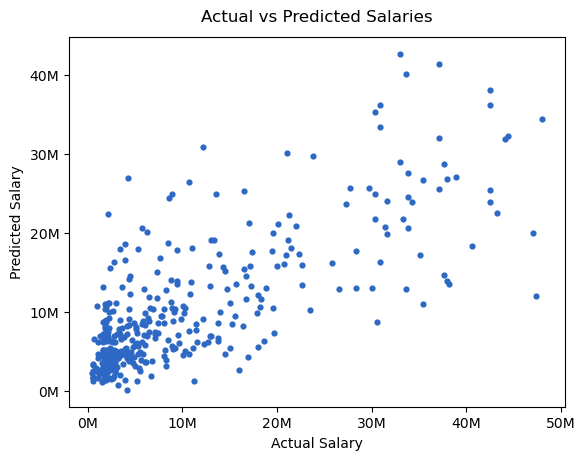

In [47]:
from matplotlib.ticker import FuncFormatter
def format_ticks_million(x, pos):
    return f'{int(x)}M'

# Apply the custom tick formatter to both x and y axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks_million))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks_million))

plt.title('Actual vs Predicted Salaries', y= 1.02)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
predictions = model.predict(X_standardized)

plt.scatter(y, predictions, c='#2D68C4', s=12)
plt.savefig('figures/Model Scatter.png', bbox_inches='tight')


plt.show()

In [48]:
df['Predictions'] = predictions

In [49]:
df['Diffs'] = df['Predictions']-y

In [50]:
model.coef_

array([ 3.81571856,  2.3209109 , -0.03441715,  3.89541278, -1.1985644 ])

In [52]:
model.intercept_

10.043764045550192

In [55]:
np.set_printoptions(precision=20)


In [56]:
model.coef_

array([ 3.815718562111416   ,  2.32091090376625    ,
       -0.034417153618212605,  3.895412777294307   ,
       -1.1985643975295406  ])

In [57]:
model.intercept_

10.043764045550192